<a href="https://colab.research.google.com/github/ITA-LOW/senex-data-sus/blob/main/Fases_1%2C_2_e_3_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



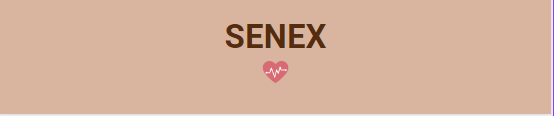

# Projeto Senex Health

#### O produto oferecido pelo projeto Senex Health é o subsídio para tomada de decisão orientada por dados em questões de saúde pública da população idosa. Para atingir esse objetivo é necessário um conhecimento técnico desses dados e foi escolhido o banco de dados do SUS. Esse banco de dados será tratado a fim de atender a metodologia CRISP-DM que guiará ao produto final.

### Ao fim desse estudo premilinar nos dados será possível:


1.   Entender e dominar a área de atuação do Senex Health;
2.   Entender os dados e tirar insigths iniciais;
3.   Preparar os dados para iniciar a mineração.







## Aquisição e tratamento dos dados

A aquisição do banco de dados foi realizada em colab próprio para esse fim. Como são dados históricos, uma vez baixado esse colab já não era mais necessário ao projeto já que os dados não mudam e o objetivo daquele colab estava muito bem delineado. Por esse motivo não será apresentado aqui os passos para a aquisição.

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/dados_2011_2020.csv")

In [3]:
df.head()

,Unnamed: 0,ESTADO,ANO,level_2,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,...,ATESTADO,ESCMAEAGR1,ESCFALAGR1,NUDIASOBCO,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,FONTESINF,ALTCAUSA
0,0,SC,2010,0,1,1,2,3102010,300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,SC,2010,1,2,1,2,15022010,1350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,SC,2010,2,3,1,2,8112010,820.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,SC,2010,3,4,1,2,4052010,1430.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,SC,2010,4,5,1,2,17052010,730.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311386 entries, 0 to 311385
Data columns (total 100 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  311386 non-null  int64  
 1   ESTADO      311386 non-null  object 
 2   ANO         311386 non-null  int64  
 3   level_2     311386 non-null  int64  
 4   CONTADOR    311386 non-null  int64  
 5   ORIGEM      311386 non-null  int64  
 6   TIPOBITO    311386 non-null  int64  
 7   DTOBITO     311386 non-null  int64  
 8   HORAOBITO   301439 non-null  float64
 9   NATURAL     210738 non-null  float64
 10  DTNASC      311100 non-null  float64
 11  IDADE       311100 non-null  float64
 12  SEXO        311386 non-null  int64  
 13  RACACOR     305487 non-null  float64
 14  ESTCIV      295872 non-null  float64
 15  ESC         291599 non-null  float64
 16  OCUP        268206 non-null  float64
 17  CODMUNRES   311386 non-null  int64  
 18  CODBAIRES   12880 non-null   float64
 19  L

### ETL - Adequando os dados para as análises

#### Ajustando as idades

In [4]:
obito = df['DTOBITO'].astype(str).str.slice()
df['DTOBITO'] = obito.str[-4:].apply(pd.to_numeric)

In [ ]:
nasc = df['DTNASC'].astype(str).str.replace('.','0')
nasc.dropna()
df['DTNASC'] = pd.to_numeric(nasc.str[-6:-2], errors='coerce')

In [6]:
df['IDADE'] = df['DTOBITO'] - df['DTNASC']
df['IDADE']

0         91.0
1         80.0
2         79.0
3         63.0
4         68.0
          ... 
311381    83.0
311382    66.0
311383    84.0
311384    85.0
311385    69.0
Name: IDADE, Length: 311386, dtype: float64

## Selecionando as colunas que farão parte da análise

In [8]:
df_senex = df[['ESTADO', 'ANO', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'CAUSABAS']]

## Selecionando o público-alvo. 
Pessoas maiores de 60 anos

In [9]:
Df_senex = df_senex.loc[df.IDADE >= 60]
Df_senex

,ESTADO,ANO,IDADE,SEXO,RACACOR,ESTCIV,CAUSABAS
0,SC,2010,91.0,1,1.0,2.0,C61
1,SC,2010,80.0,1,1.0,2.0,I500
2,SC,2010,79.0,2,1.0,3.0,I500
3,SC,2010,63.0,1,1.0,2.0,C710
4,SC,2010,68.0,2,1.0,2.0,C349
...,...,...,...,...,...,...,...
311381,SC,2018,83.0,2,1.0,3.0,I429
311382,SC,2018,66.0,1,4.0,1.0,K769
311383,SC,2018,84.0,1,1.0,2.0,K921
311384,SC,2018,85.0,2,1.0,3.0,I219


In [10]:
Df_senex.IDADE.describe()


count    208531.000000
mean         77.087488
std           9.839754
min          60.000000
25%          69.000000
50%          77.000000
75%          85.000000
max         116.000000
Name: IDADE, dtype: float64

In [12]:
numerical =['ANO', 'IDADE']
categorical = [
  'ESTADO', 'SEXO', 'RACACOR', 'ESTCIV', 'CAUSABAS'
]

## Realizando a exploratória inicial

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#O banco de dados que será usado na exploratória tem essas dimensões
Df_senex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208531 entries, 0 to 311385
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ESTADO    208531 non-null  object 
 1   ANO       208531 non-null  int64  
 2   IDADE     208531 non-null  float64
 3   SEXO      208531 non-null  int64  
 4   RACACOR   204574 non-null  float64
 5   ESTCIV    204380 non-null  float64
 6   CAUSABAS  208531 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 20.8+ MB


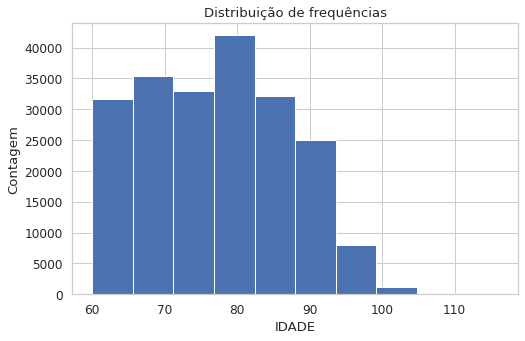

In [17]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    Df_senex['IDADE'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='IDADE', ylabel='Contagem', title='Distribuição de frequências');

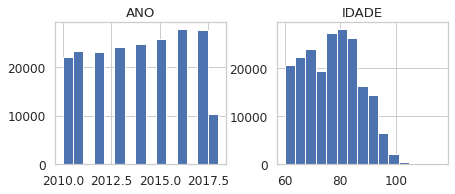

In [22]:
Df_senex[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

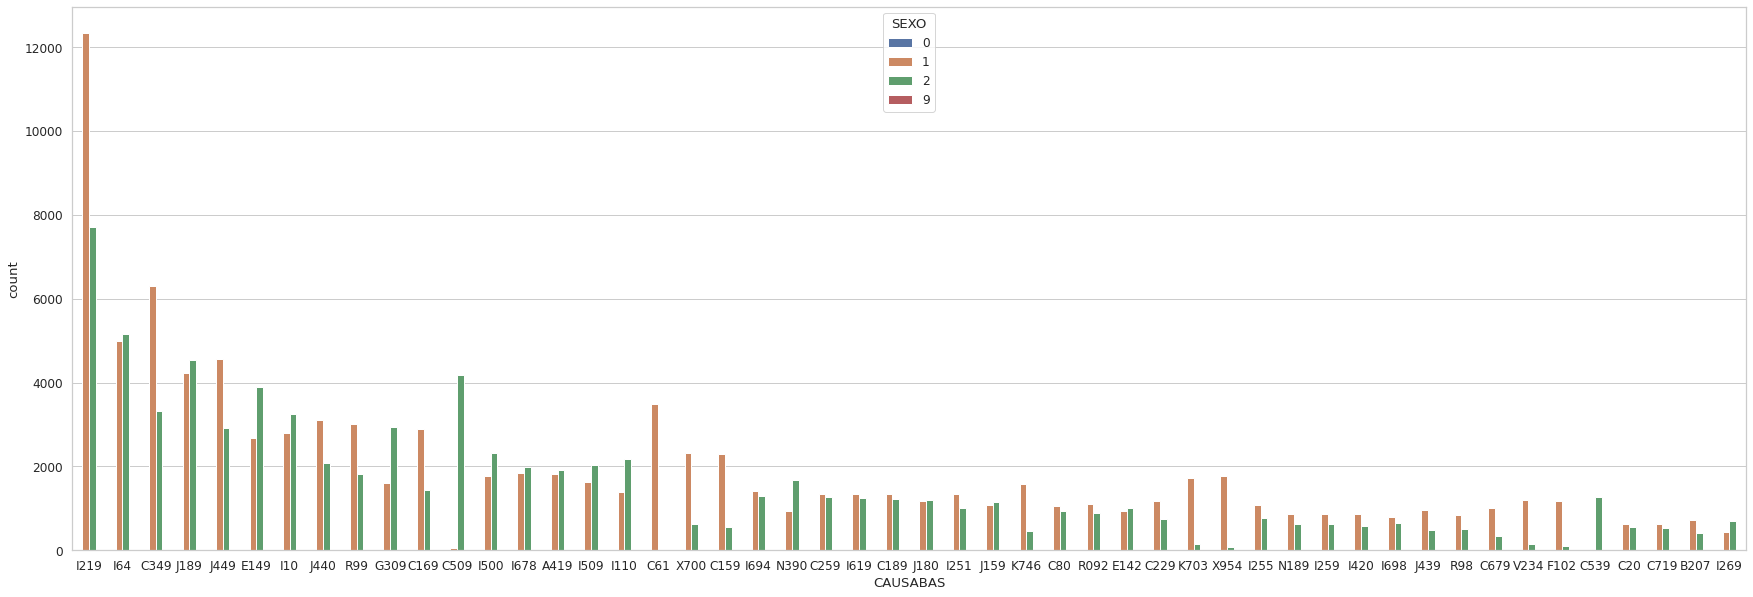

In [38]:
fig, ax = plt.subplots(figsize=(30, 10))
sorted_nb = df_senex.groupby(['CAUSABAS'])['CAUSABAS'].count().nlargest(50)
sns.countplot(ax=ax,data=df_senex,x=df_senex['CAUSABAS'],hue="SEXO", order=list(sorted_nb.index[0:50]))
plt.show()

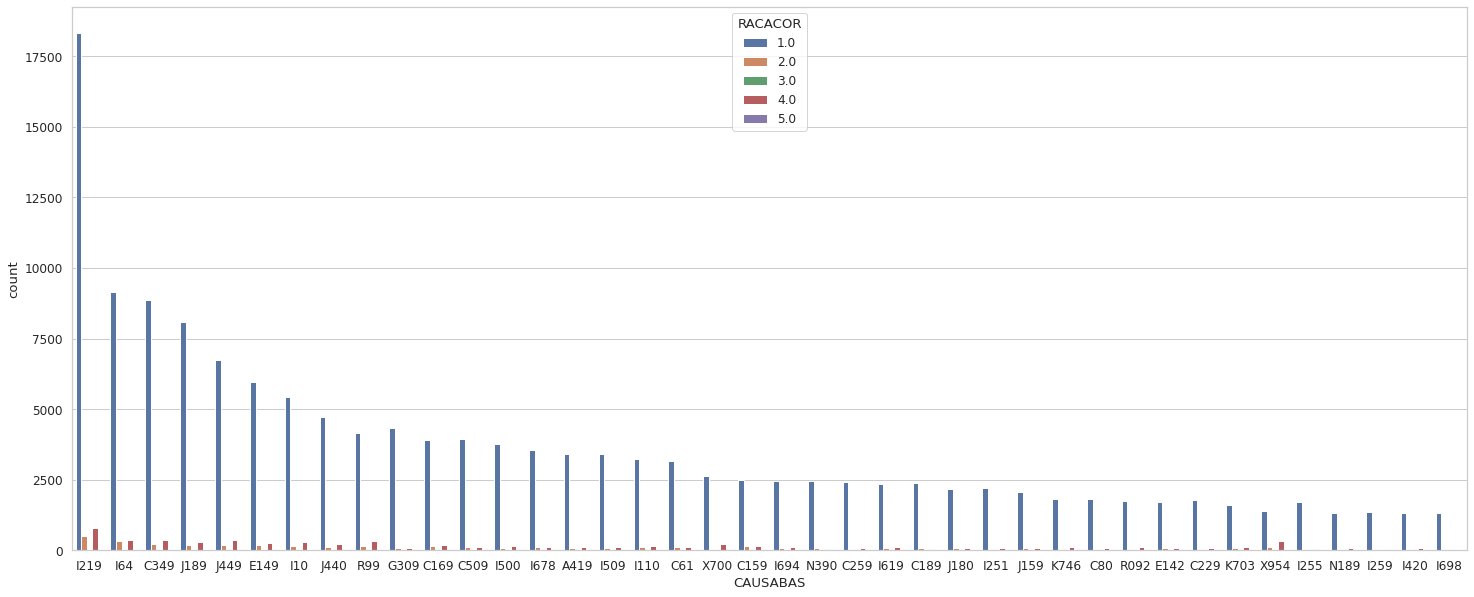

In [40]:
fig, ax = plt.subplots(figsize=(25, 10))
sorted_nb = df_senex.groupby(['CAUSABAS'])['CAUSABAS'].count().nlargest(50)
sns.countplot(ax=ax,data=df_senex,x=df_senex['CAUSABAS'],hue="RACACOR", order=list(sorted_nb.index[0:40]))
plt.show()

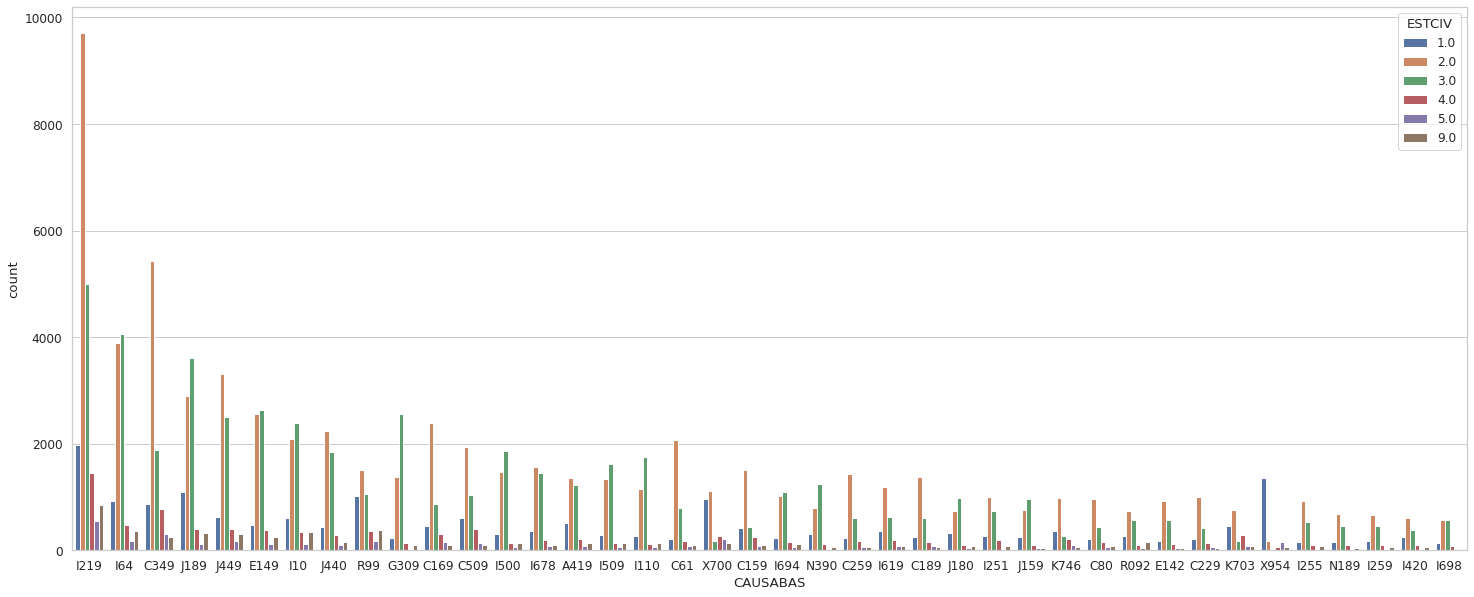

In [42]:
fig, ax = plt.subplots(figsize=(25, 10))
sorted_nb = df_senex.groupby(['CAUSABAS'])['CAUSABAS'].count().nlargest(50)
sns.countplot(ax=ax,data=df_senex,x=df_senex['CAUSABAS'],hue="ESTCIV", order=list(sorted_nb.index[0:40]))
plt.show()

É possível tirar insights importantes como por exemplo a CID 10 I219 - Doença cardíaca é um problema que aflige a população em sentido lato. Ataca com mais frequência todos os agrupamentos (raça/cor, estado civil...). É um bom alvo para pesquisas.

### Esquema de validação dos dados - visando mineração

In [46]:
!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 15.7 MB/s 


In [47]:
import pandera as pa

In [49]:
schema = pa.DataFrameSchema(
    columns = {
        "ESTADO":pa.Column(pa.String, pa.Check.str_length(2,2)),
        "ANO":pa.Column(pa.Int),
        "IDADE":pa.Column(pa.Int),
        "SEXO":pa.Column(pa.Int),
        "RACACOR":pa.Column(pa.Int),
        "ESTCIV":pa.Column(pa.Int),
        "CAUSABAS":pa.Column(pa.String)
    }
)

In [50]:
schema.validate(Df_senex)

SchemaError: ignored

In [52]:
Df_senex["IDADE"] = Df_senex["IDADE"].astype(float).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
schema.validate(Df_senex)

SchemaError: ignored

In [62]:
Df_senex['RACACOR'].fillna(value=0, inplace=True)
Df_senex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208531 entries, 0 to 311385
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ESTADO    208531 non-null  object 
 1   ANO       208531 non-null  int64  
 2   IDADE     208531 non-null  int64  
 3   SEXO      208531 non-null  int64  
 4   RACACOR   208531 non-null  int64  
 5   ESTCIV    204380 non-null  float64
 6   CAUSABAS  208531 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 20.8+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [59]:
schema.validate(Df_senex)

SchemaError: ignored

In [63]:
Df_senex["RACACOR"] = Df_senex["RACACOR"].astype(float).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
schema.validate(Df_senex)

SchemaError: ignored

In [66]:
Df_senex['ESTCIV'].fillna(value=0, inplace=True)
Df_senex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208531 entries, 0 to 311385
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ESTADO    208531 non-null  object 
 1   ANO       208531 non-null  int64  
 2   IDADE     208531 non-null  int64  
 3   SEXO      208531 non-null  int64  
 4   RACACOR   208531 non-null  int64  
 5   ESTCIV    208531 non-null  float64
 6   CAUSABAS  208531 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 20.8+ MB


In [67]:
schema.validate(Df_senex)

SchemaError: ignored

In [68]:
Df_senex['ESTCIV'] = Df_senex['ESTCIV'].astype(float).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
schema.validate(Df_senex) #como retornou o dataframe, significa que agora ele está devidamente tratado

,ESTADO,ANO,IDADE,SEXO,RACACOR,ESTCIV,CAUSABAS
0,SC,2010,91,1,1,2,C61
1,SC,2010,80,1,1,2,I500
2,SC,2010,79,2,1,3,I500
3,SC,2010,63,1,1,2,C710
4,SC,2010,68,2,1,2,C349
...,...,...,...,...,...,...,...
311381,SC,2018,83,2,1,3,I429
311382,SC,2018,66,1,4,1,K769
311383,SC,2018,84,1,1,2,K921
311384,SC,2018,85,2,1,3,I219


In [71]:
Df_senex.to_csv("data_frame_pós_ETL.csv") #salvando o banco de dados que será usado no colab de mineração

In [72]:
Df_senex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208531 entries, 0 to 311385
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ESTADO    208531 non-null  object
 1   ANO       208531 non-null  int64 
 2   IDADE     208531 non-null  int64 
 3   SEXO      208531 non-null  int64 
 4   RACACOR   208531 non-null  int64 
 5   ESTCIV    208531 non-null  int64 
 6   CAUSABAS  208531 non-null  object
dtypes: int64(5), object(2)
memory usage: 20.8+ MB


# Considerações finais
Com esse estudo preliminar foi possível atender as fases de:

1 - Entendimento do negócio: tendo como base o conhecimento sobre a população-alvo;

2 - Entendimento dos dados: adquiridos de base de dados segura e retratando a realidade fiel da população-alvo;

3 - Preparação dos dados: atravéz de tarefas de ETL(extract, transform and load) e por esquema de validação com auxílio do módulo Pandera.

<div align="center"> 

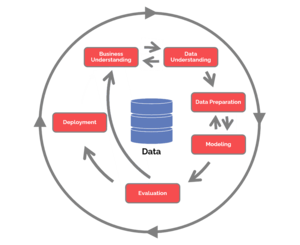